# Advection equation with 2-point centered difference for $u_x$

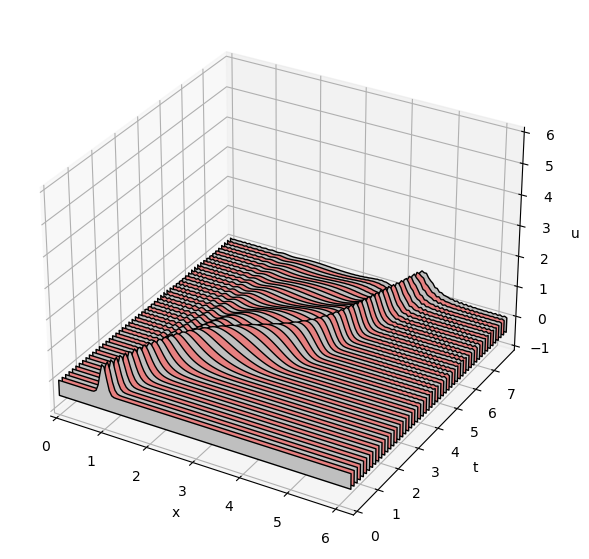

In [1]:
from numpy import empty,linspace, roll, arange, pi, sin, exp, hstack
from waterfall import waterfall
import matplotlib.pyplot as plt
#%matplotlib notebook

# spatial grid
L = 2*pi
n = 128
h = L/n

# time grid
T = 8.
k = h/4
m = int(T/k)  # number of time steps

def g(x): return exp( -100*(x-1)**2 )# IC

def c(x): return 0.2 + sin(x-1)**2  

x = linspace(0,L,n,endpoint=False)
cgrid = c(x)

w = empty((m+1,n))

w[0,:] = g(x)

# quick and dirty first step
w[1,:] = g(x-k*c(1))

for j in range(1,m):
    
    # approx to spatial derivative  - FINITE DIFFERENCE
    wx = ( roll(w[j,:],-1) - roll(w[j,:],1) )/2/h
    
    w[j+1,:] = w[j-1,:] - 2*k*cgrid*wx
    
# make a plot
plotskip = 12  # every 12th time point for plotting
tvals = k*arange(m+1)[::plotskip]
wvals = w[::plotskip,:]
plt.figure(figsize=(7,7))
waterfall(x,tvals,wvals)

# Advection equation with spectral $u_x$

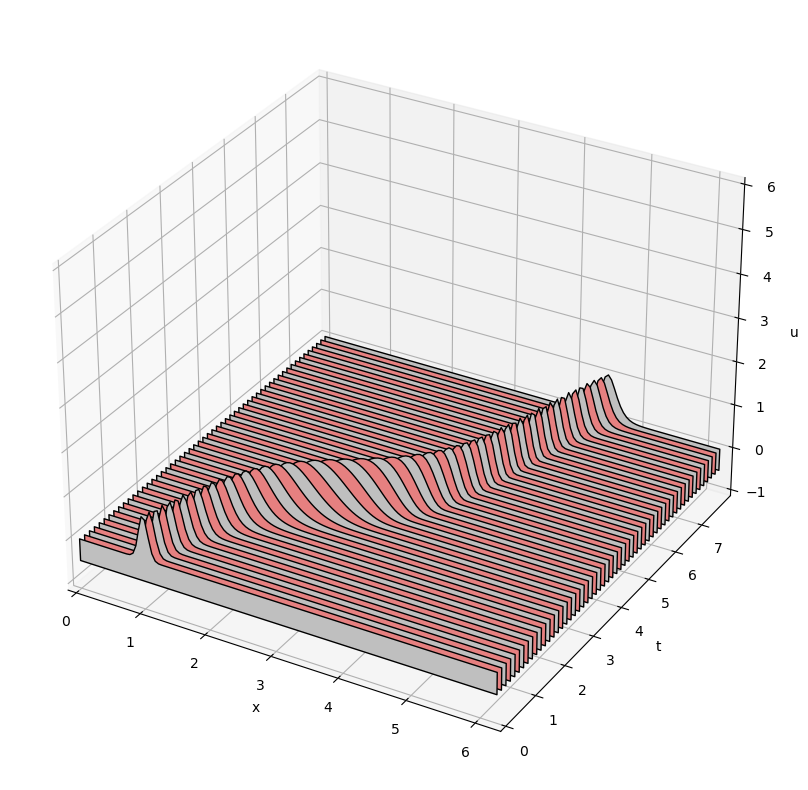

In [2]:
from numpy import empty,linspace, roll, arange, pi, sin, exp, hstack, real
from waterfall import waterfall
import matplotlib.pyplot as plt
from scipy.fftpack import fft,ifft
#%matplotlib notebook

# spatial grid
L = 2*pi
n = 128
h = L/n

# time grid
T = 8.
k = h/4
m = int(T/k)  # number of time steps

def g(x): return exp( -100*(x-1)**2 )# IC

def c(x): return 0.2 + sin(x-1)**2  

x = linspace(0,L,n,endpoint=False)
cgrid = c(x)

w = empty((m+1,n))

w[0,:] = g(x)

# quick and dirty first step
w[1,:] = g(x-k*c(1))

for j in range(1,m):
    
    # approx to spatial derivative - SPECTRAL
    y = fft( w[j,:] )
    kvals = hstack( (range(n//2),[0],range(-n//2+1,0) ) ) # [0] to zero out the Nyquist component
    wx = real( ifft( 2*pi*1j*kvals/L*y ) )
                     
    w[j+1,:] = w[j-1,:] - 2*k*cgrid*wx
    
# make a plot
plotskip = 12  # every 12th time point for plotting
tvals = k*arange(m+1)[::plotskip]
wvals = w[::plotskip,:]
plt.figure(figsize=(10,10))
waterfall(x,tvals,wvals)